##  **1.Business Understanding**

#### Name	Attribute/Target	Description:
* **ID**	-N/A	-Unique number to represent patient ID
* **PRG**	-Attribute1	-Plasma glucose
* **PL**	-Attribute 2 -Blood Work Result-1 (mu U/ml)
* **PR**	-Attribute 3 -Blood Pressure (mm Hg)
* **SK**	-Attribute 4 -Blood Work Result-2 (mm)
* **TS**	-Attribute 5 -Blood Work Result-3 (mu U/ml)
* **M11**	-Attribute 6 -Body mass index (weight in kg/(height in m)^2)
* **BD2**	-Attribute 7 -Blood Work Result-4 (mu U/ml)
* **Age**	-Attribute 8 -patients age (years)
* **Insurance** -N/A	-If a patient holds a valid insurance card
* **Sepssis**	-Target	-Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### **Questions**
1. Does Age affect Blood Pressure(PR)?
2. How many Patients Have Insurance Cover?
3. What is the concentrated age group of most patients? And do they have Insurance Cover?
4. Does high PRG contribute to Sepssis?
5. What is the highest type of blood work done?

#### **Hypothesis**
* Null: High Body Mass does not attribute to high Blood Pressure(PR)
* Alternative : High body mass(M11) attributes to high Blood Pressure(PR)

##  **2.Data Understanding**

In [1197]:
# import the necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.express as px  

#Data Understanding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import RandomOverSampler, SMOTE



from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import joblib


import warnings

warnings.filterwarnings('ignore')

#### Load Datasets

In [1198]:
# Load the test dataset
df_test = pd.read_csv("./data/Paitients_Files_Test.csv")
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [1199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


#### EDA on Test Data

In [1200]:
df_test.duplicated().sum()

0

In [1201]:
df_test.isna().sum().sum()

0

In [1202]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


#### EDA on Train Data

In [1277]:
# Load the train dataset
df1 = pd.read_csv("./data/Paitients_Files_Train.csv")
df1.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [1204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [1205]:
df1.duplicated().sum()

0

In [1206]:
df1.isna().sum().sum()

0

In [1207]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


#### Univariate analysis

<Figure size 1400x800 with 0 Axes>

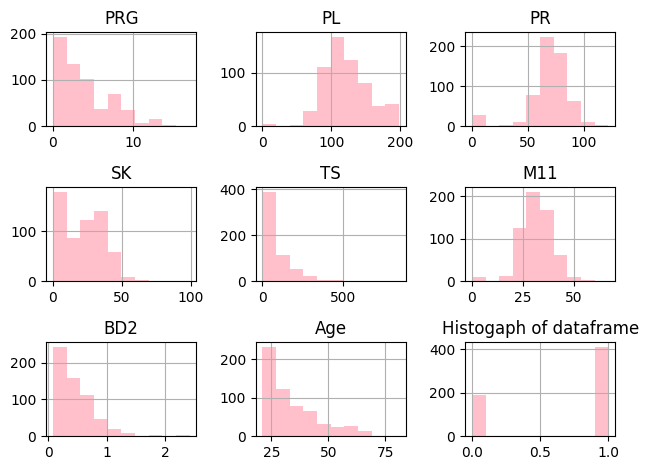

In [1208]:
plt.figure(figsize=(14, 8))
df1.hist(color='pink')
plt.tight_layout()
plt.title('Histogaph of dataframe')
plt.show();

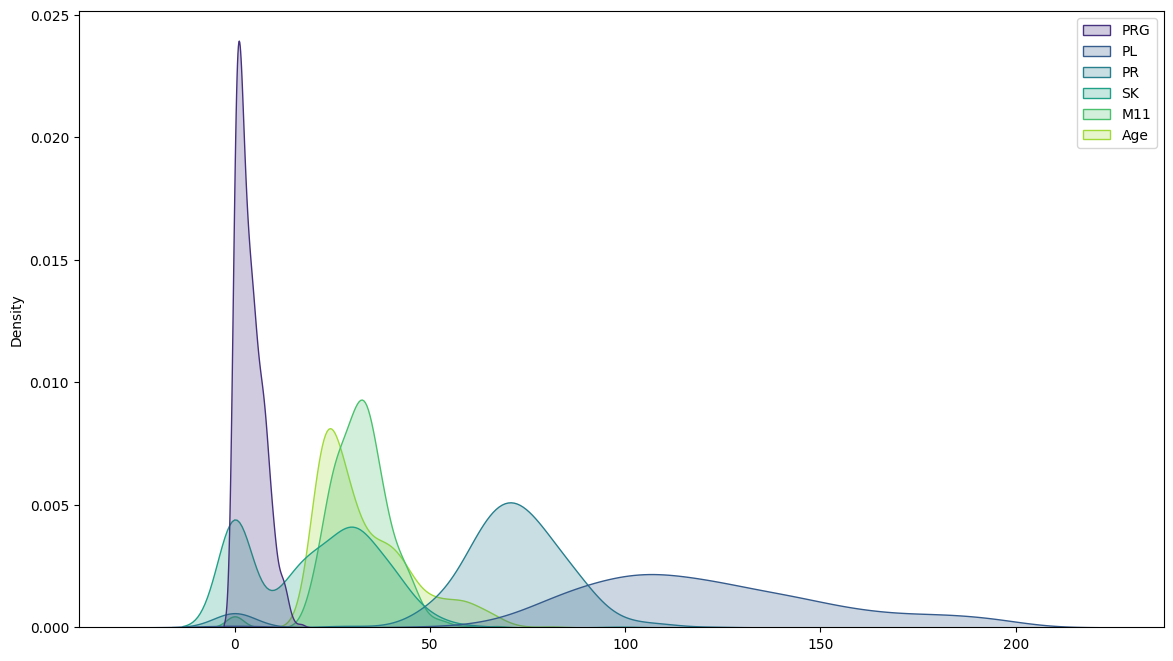

In [1209]:
plt.figure(figsize=(14,8))
sns.kdeplot(df1.drop(['Sepssis','TS','ID','BD2','Insurance'],axis=1),palette='viridis',fill=True)
plt.show();

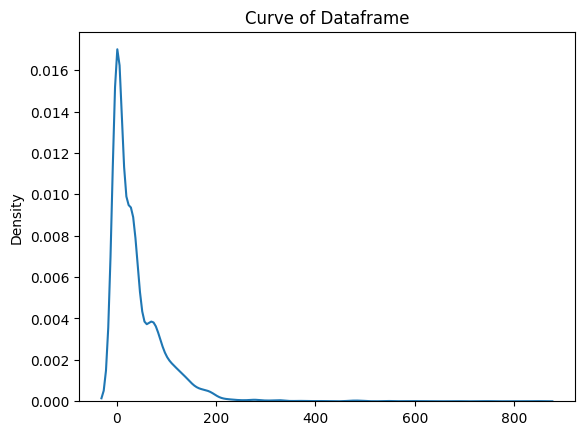

In [1210]:

sns.kdeplot(df1.drop(['ID','Sepssis'],axis=1).values.ravel());
plt.title('Curve of Dataframe');

In [1211]:
df1.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

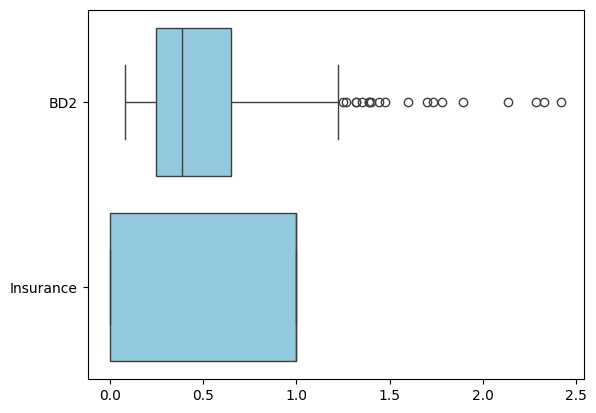

In [1212]:
data3 =df1[['BD2', 'Insurance']]
sns.boxplot(data=data3,color='Skyblue',orient='h');

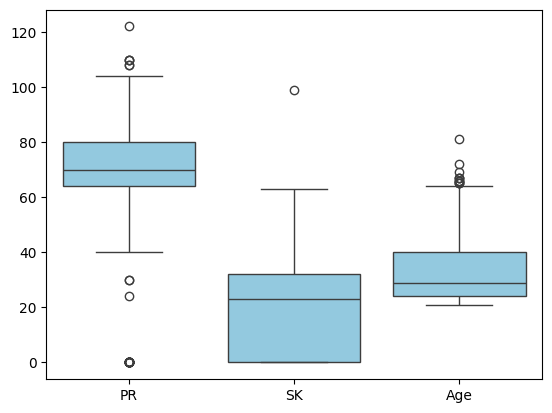

In [1213]:
data1 =df1[['PR', 'SK','Age']]
sns.boxplot(data=data1,color=('skyblue'));

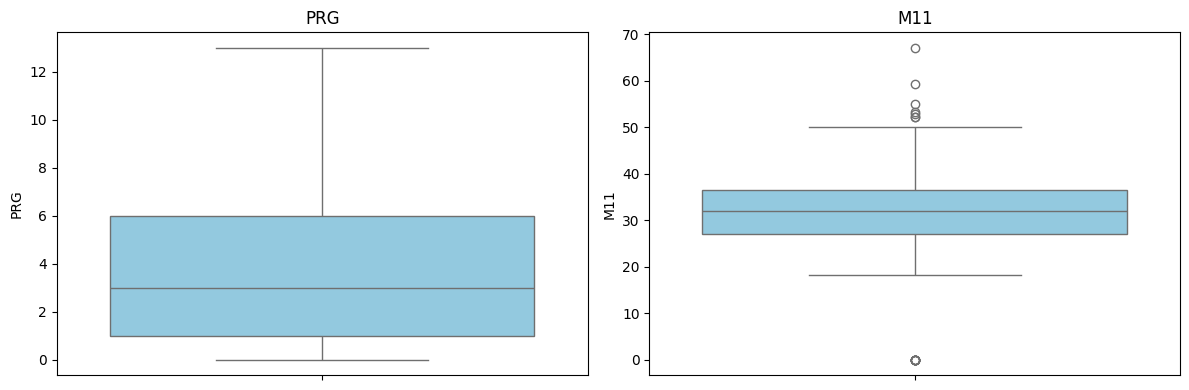

In [1214]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'PRG'
sns.boxplot(data=df, y='PRG', color='skyblue', ax=axs[0])
axs[0].set_title('PRG')

# Boxplot for 'M11'
sns.boxplot(data=df1, y='M11',color='skyblue', ax=axs[1])
axs[1].set_title('M11')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


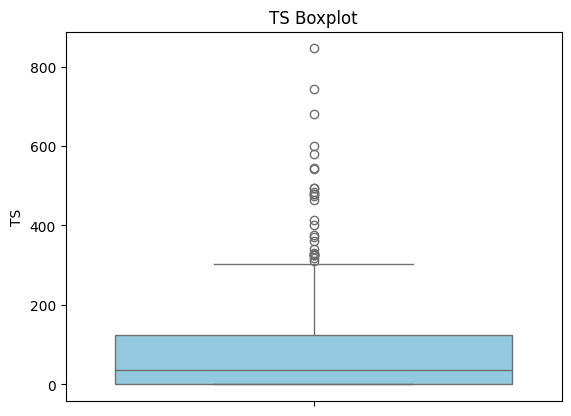

In [1215]:
boxplot =df1['TS']
sns.boxplot(data=boxplot,color='skyblue')
plt.title('TS Boxplot');

#### Bivariate

In [1216]:
data = df1[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']]
df_corr =data.corr(numeric_only=True)
df_corr

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


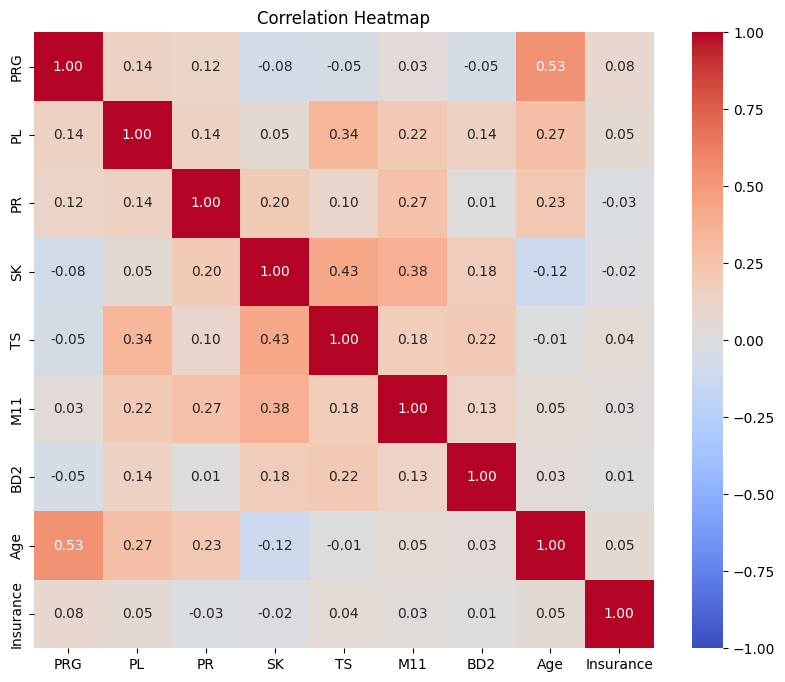

In [1217]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

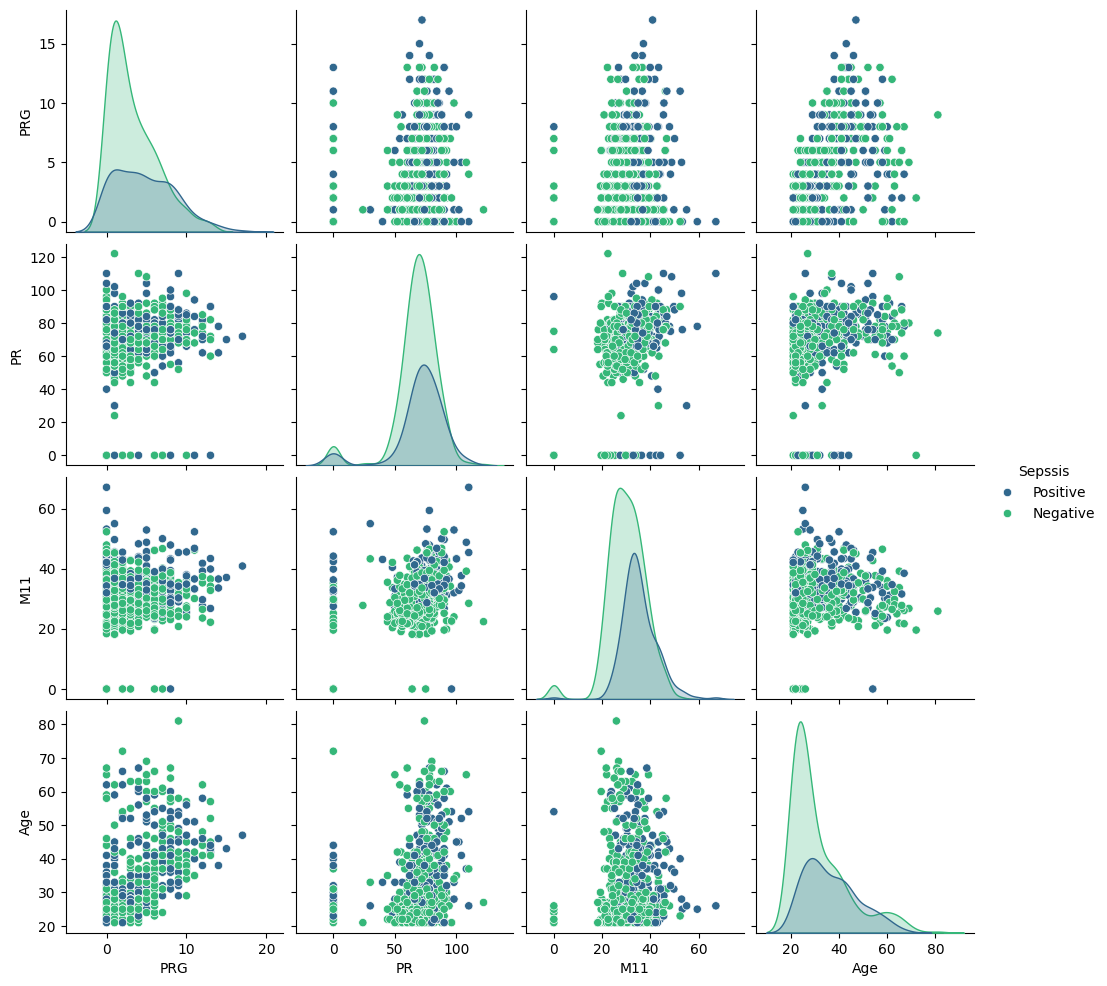

In [1218]:
data = df1[['PRG','PR','M11','Age', 'Sepssis']]
sns.pairplot(data=data,hue='Sepssis',palette='viridis',kind='scatter')
plt.show()

### Multivariate

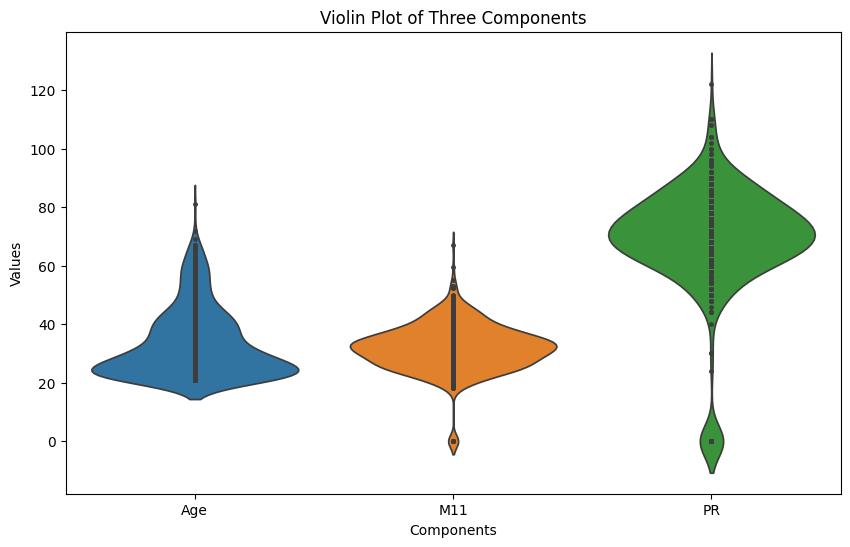

In [1219]:
# Select three components for the violin plot
component1 = 'Age'
component2 = 'Sepssis'
component3 = 'M11'
component4  = 'PR'
 
# Prepare the data for the violin plot
selected_data = df1[[component1, component2, component3,component4]]
 
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_data, inner="points")  # inner="points" to show individual data points inside the violins
plt.title('Violin Plot of Three Components')
plt.xlabel('Components')
plt.ylabel('Values')
plt.show()

## **Questions**

#### 1. Does Age affect Blood Pressure(PR)?

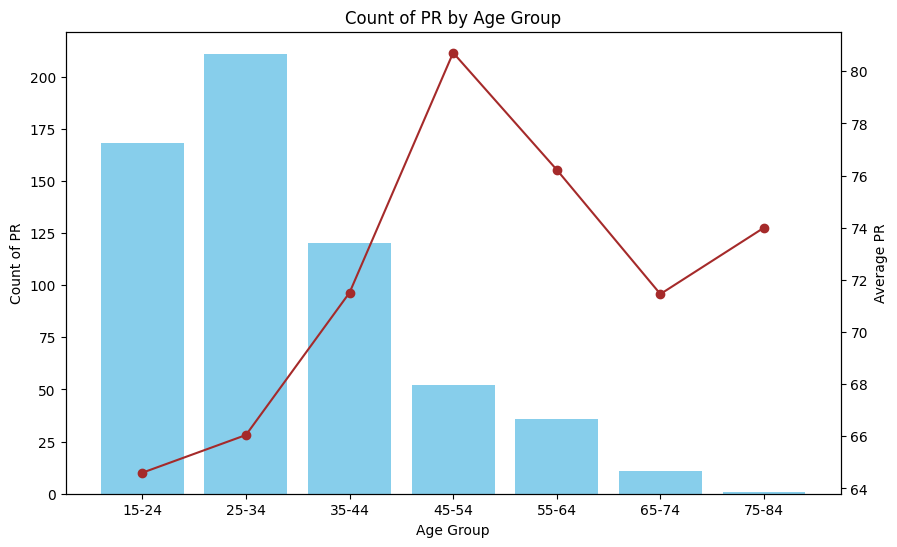

In [1220]:
age_pr_count = df1.groupby('Age')['PR'].count()

# Create subplots
age_bins = range(15, 91, 10)
age_labels = [f"{i}-{i+9}" for i in range(15, 81, 10)]

# Bin ages into age groups
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age_Group' and calculate count and average of PR
age_pr_summary = df1.groupby('Age_Group')['PR'].agg(['count', 'mean'])

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting count of PR by age group in bar chart
ax1.bar(age_pr_summary.index, age_pr_summary['count'], color='skyblue')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count of PR')
ax1.set_title('Count of PR by Age Group')

# Create a second y-axis for average PR values
ax2 = ax1.twinx()
ax2.plot(age_pr_summary.index, age_pr_summary['mean'], color='brown', marker='o', linestyle='-')
ax2.set_ylabel('Average PR')

# Show plot
plt.show()

##### 2. How many Patients Have Insurance Cover?

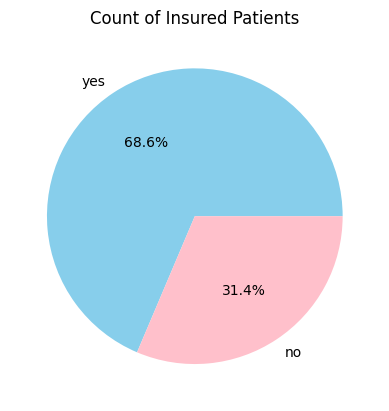

In [1221]:
insurance_count = df1['Insurance'].value_counts()
# custom label dictionary to map values to labels
labels = {1: 'yes', 0: 'no'}

# Map the values in the 'Insurance' column to labels for plotting
labels_for_plot = insurance_count.index.map(labels)

# Plot the pie chart
plt.pie(insurance_count, labels=labels_for_plot, colors=('skyblue', 'pink'), autopct='%1.1f%%')
# Add title
plt.title('Count of Insured Patients')
# Show the plot
plt.show()

#### 3.What is the concentrated age group of most patients? And do they have Insurance Cover?

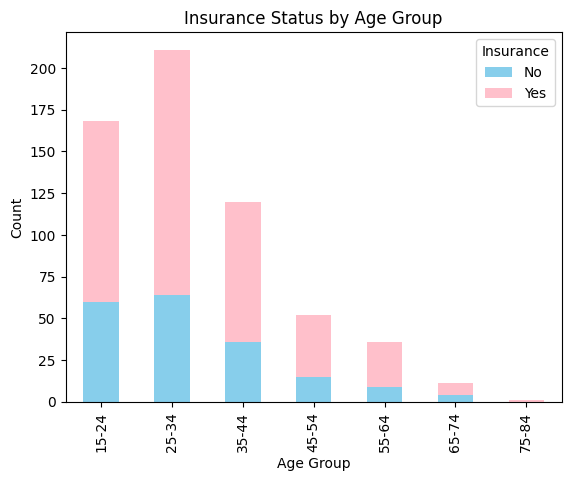

In [1222]:
age_bins = range(15, 91, 10)
age_labels = [f"{i}-{i+9}" for i in range(15, 81, 10)]

# Bin ages into age groups
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by age groups and insurance status
age_insurance_counts = df1.groupby(['Age_Group', 'Insurance']).size().unstack(fill_value=0)

# Plotting
ax = age_insurance_counts.plot(kind='bar', stacked=True, color=('skyblue', 'pink'))

# Set plot title and labels
plt.title('Insurance Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Set legend
plt.legend(title='Insurance', labels=['No', 'Yes'])

plt.show()

#### 4. Does high PRG contribute to Sepssis?

In [1223]:
df1.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'Age_Group'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


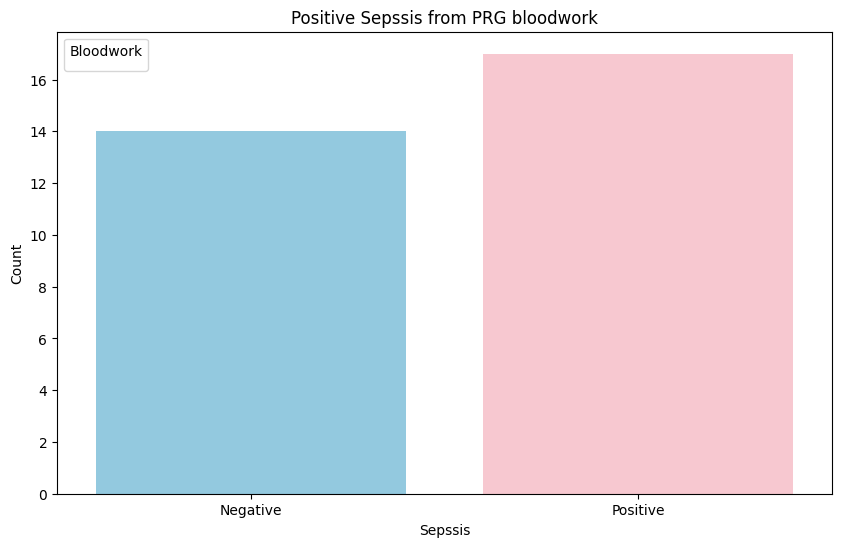

In [1224]:

Sepssis = df1.groupby('PRG')['Sepssis'].value_counts().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=Sepssis, x='Sepssis', hue='Sepssis',palette={'Positive': 'pink', 'Negative': 'skyblue'})
plt.title('Positive Sepssis from PRG bloodwork')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.legend(title='Bloodwork')

plt.show();


#bloodwork.plot.bar(x='Sepssis')

5. What is the highest type of blood work done?

In [ ]:
bloodwork = df1.groupby(['PL','TS','BD2'])['Sepssis'].value_counts().reset_index()

sns.countplot(data=bloodwork,hue='Sepssis',pallete={'Positive':'pink', 'Negative':'blue'})

### **Hypothesis Testing:**

* Null: High Body Mass does not attribute to high Blood Pressure(PR)
* Alternative : High body mass(M11) attributes to high Blood Pressure(PR)

In [1226]:
blood_pressure = df1['PR']
body_mass_index = df1['M11']

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(blood_pressure, body_mass_index)
print(f"Correlation coefficient: {corr_coefficient:.2f}")
print(f"P-value: {p_value}")

# Results
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant correlation between blood pressure and body mass index.")
else:
    print("Fail to reject the null hypothesis - There is no significant correlation between blood pressure and body mass index.")

Correlation coefficient: 0.27
P-value: 1.9989399562103356e-11
Reject the null hypothesis - There is a significant correlation between blood pressure and body mass index.


* The correlation coefficient, often denoted as r, is a statistical measure that quantifies the strength and direction of the linear relationship between two variables
* The correlation coefficient provides a numerical value that represents the strength of the linear relationship between the two variables. It ranges from -1 to 1, where:
  * r=1 indicates a perfect positive linear relationship (as one variable increases, the other variable increases).
  * r=−1 indicates a perfect negative linear relationship (as one variable increases, the other variable decreases).
  * r=0 indicates no linear relationship between the variables

#### **Insights:**
* Datasets do not have missing values
* Datasets do not have duplicated values
* Dataset does not have a normal distribution with some being skewed to the right
* Except for insurance all the data columns have outliers
* Most of the data is positively correlated with one another with only a few negative correlation like SK having a negative correlation of -0.12 with age, and PRG having a -0.08 correlation with SK.
* PRG has a positive correlation of 0.53 with Age while SK a correlation of 0.43 with TS.
* Most patients are between the ages of 25 to 34 and most of them are insured.
* There is a significant correlation between body mass index and blood pressure as seen from the Hypothesis testing conclusion

In [1227]:
data = df1[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance','Sepssis']]
Q1 = data.drop('Sepssis', axis=1).quantile(0.25)
Q3 = data.drop('Sepssis', axis=1).quantile(0.75)
IQR = Q3 - Q1

In [1228]:
IQR

PRG            5.000
PL            41.000
PR            16.000
SK            32.000
TS           123.500
M11            9.450
BD2            0.399
Age           16.000
Insurance      1.000
dtype: float64

In [1229]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [1230]:
lower_lim

PRG           -6.5000
PL            37.5000
PR            40.0000
SK           -48.0000
TS          -185.2500
M11           12.9250
BD2           -0.3505
Age            0.0000
Insurance     -1.5000
dtype: float64

In [1231]:
upper_lim

PRG           13.5000
PL           201.5000
PR           104.0000
SK            80.0000
TS           308.7500
M11           50.7250
BD2            1.2455
Age           64.0000
Insurance      2.5000
dtype: float64

In [1232]:
df = data[~((data.drop('Sepssis', axis=1) < lower_lim) | (data.drop('Sepssis', axis=1) > upper_lim)).any(axis=1)]

In [1233]:
df.shape

(493, 10)

## **3. DATA PREPARATION**

##### Split Data to X,y

In [1234]:
df.head(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive


In [1235]:
X = df.drop('Sepssis', axis=1)
X_features = X.columns
X_features 

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [1236]:
y = df['Sepssis']
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
5    Negative
Name: Sepssis, dtype: object

In [1237]:
df['Sepssis'].value_counts()

Sepssis
Negative    337
Positive    156
Name: count, dtype: int64

In [1238]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=42)

#### Encode y-label

In [1239]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#### Pipeline

In [1240]:
preprocessor = ColumnTransformer(transformers=[
    ('imputer',SimpleImputer(strategy='median'),X_features),
    ('scaler',RobustScaler(),X_features),
    ('log_transformation',FunctionTransformer(np.log1p),X_features)
])

#### Check dataset

In [1241]:
X_train.shape

(369, 9)

In [1242]:
X_test.shape

(124, 9)

In [1243]:
y_train.value_counts()

Sepssis
Negative    252
Positive    117
Name: count, dtype: int64

In [1244]:
y_test.value_counts()

Sepssis
Negative    85
Positive    39
Name: count, dtype: int64

## **4. MODELING & EVALUATION**

In [1245]:
models = [
    ('knn',KNeighborsClassifier()),
    ('logistic_regression',LogisticRegression(solver='liblinear',random_state=42)),
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('random_forest',RandomForestClassifier(random_state=42))
]

target_names = ['Positive','Negative']

In [1246]:
# Train Models

for model_name,classifier in models:
    
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])

    pipeline.fit(X_train,y_train_encoded)
    y_predict = pipeline.predict(X_test)

    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_predict,target_names=target_names))
    print('='*70)

Report for knn
              precision    recall  f1-score   support

    Positive       0.77      0.80      0.79        85
    Negative       0.53      0.49      0.51        39

    accuracy                           0.70       124
   macro avg       0.65      0.64      0.65       124
weighted avg       0.70      0.70      0.70       124

Report for logistic_regression
              precision    recall  f1-score   support

    Positive       0.80      0.92      0.86        85
    Negative       0.74      0.51      0.61        39

    accuracy                           0.79       124
   macro avg       0.77      0.72      0.73       124
weighted avg       0.78      0.79      0.78       124

Report for decision_tree
              precision    recall  f1-score   support

    Positive       0.83      0.84      0.83        85
    Negative       0.63      0.62      0.62        39

    accuracy                           0.77       124
   macro avg       0.73      0.73      0.73       124
wei

#### UNBALANCED DATA MODELS METRICS

In [1247]:
unbalanced_metrics = pd.DataFrame(columns=['model_name','Accuracy','Precision','recall','f1_score'])

all_pipelines = {}

for model_name,classifier in models:

    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])


    pipeline.fit(X_train,y_train_encoded)

    y_predict = pipeline.predict(X_test)

   

    metrics= classification_report(y_test_encoded,y_predict,output_dict=True)

    all_pipelines[model_name] =pipeline

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score =metrics ['weighted avg']['f1-score']

    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy,precision,recall,f1_score]

unbalanced_metrics.sort_values(by='f1_score',ascending=False)

,model_name,Accuracy,Precision,recall,f1_score
3,random_forest,0.806452,0.801417,0.806452,0.797596
1,logistic_regression,0.790323,0.784189,0.790323,0.778173
2,decision_tree,0.766129,0.764564,0.766129,0.765294
0,knn,0.701613,0.695687,0.701613,0.698232


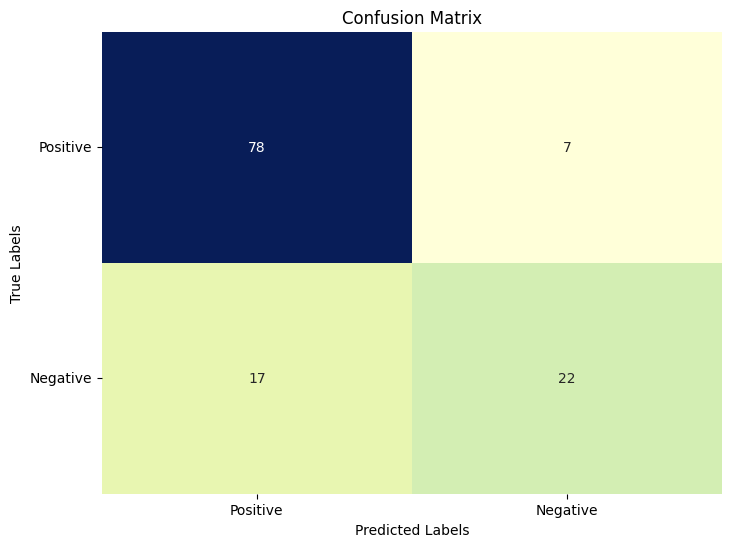

In [1248]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=target_names)
plt.yticks(ticks=[0.5, 1.5], labels=target_names, rotation=0)
plt.show()

* Following the dropping of the outliers, our dataset consists of 493 rows and 9 columns
* From the trained models, the Random Forest is the best performing out of the the four trained models with an F1-score of 0.79 and  a recall of 80% with an 82% of positive   predictions and 76% negative prediction.
* The Logistic regression follows RF closely with an F1 score of 0.77 and a recall of 79% with an 80% for the positive predictions and 74% of the negative predictions.

#### BALANCE DATA SET

In [1249]:

sampler = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

In [1250]:
pd.DataFrame(y_train_resampled).value_counts()

0
0    252
1    252
Name: count, dtype: int64

In [1251]:
len(y_train_resampled)

504

In [1252]:
len(X_train_resampled)

504

#### Models training after balancing dataset

In [1253]:
balanced = pd.DataFrame(columns=['Model_name','Accuracy','Precision','recall','f1_score'])

bal_pipelines = {}
for model_name,classifier in models:


   pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])
   
   pipeline.fit(X_train_resampled,y_train_resampled) 

   y_predict = pipeline.predict(X_test)

   metrics = classification_report(y_test_encoded,y_predict, output_dict=True)

   bal_pipelines[model_name] = pipeline

   accuracy = metrics['accuracy']
   precision = metrics['weighted avg']['precision']
   recall = metrics['weighted avg']['recall']
   f1_score = metrics['weighted avg']['f1-score']

   balanced.loc[len(balanced)] = [model_name, accuracy,precision,recall,f1_score]

balanced.sort_values(by='f1_score',ascending=False)
   

,Model_name,Accuracy,Precision,recall,f1_score
3,random_forest,0.814516,0.810115,0.814516,0.810814
1,logistic_regression,0.758065,0.774929,0.758065,0.763344
2,decision_tree,0.709677,0.702180,0.709677,0.705168
0,knn,0.685484,0.738881,0.685484,0.696500


* After balancing the dataset, the Random Forest is still the best performing model with an F1-score of 0.81 from 0.79. The recall perfomance has also changed as well as  precision with an improvement from 80% to 81%.
* There is no improvement in the rest of the models.

## **5. HYPERPARAMETER TUNING**

In [1254]:
# tuned_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','recall','f1_score'])



# param_grids = {
#     'knn': {
#         'models__n_neighbors': [3, 5, 7],
#         'models__weights': ['uniform', 'distance'],
#         'models__metric': ['euclidean', 'manhattan']
#     },
#     'logistic_regression': {
#         'models__C': [0.1, 1, 10],
#         'models__penalty': ['l1', 'l2'],
#         'models__solver': ['liblinear']
#     },
#     'decision_tree': {
#         'models__max_depth': [None, 5, 10, 20],
#         'models__min_samples_split': [2, 5, 10],
#         'models__min_samples_leaf': [1, 2, 4]
#     },
#     'random_forest': {
#         'models__n_estimators': [50, 100, 200],
#         'models__max_depth': [None, 10, 20],
#         'models__min_samples_split': [2, 5, 10],
#     }
# }


# for model_name,pipeline in all_pipelines.items():
#     param_grid = param_grids[model_name]
#     grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='f1')
#     grid_search.fit(X_train, y_train_encoded)


#     best_pipeline = grid_search.best_estimator_
#     all_pipelines[classifier] = best_pipeline

#     y_predict = best_pipeline.predict(X_test)

#     tuned_metrics = classification_report(y_test_encoded,y_predict, output_dict=True)

#     accuracy = metrics['accuracy']
#     precision = metrics['weighted avg']['precision']
#     recall = metrics['weighted avg']['recall']
#     f1_score = metrics['weighted avg']['f1-score']

#     tuned_df.loc[len(tuned_df)] = [model_name, accuracy,precision,recall,f1_score]

# tuned_df.sort_values(by='f1_score',ascending=False)
   

    

* Random Forest model tuning

In [1255]:
classifier = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
])
   

   

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

# Create GridSearchCV with the instantiated pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [1256]:
best_estimator = grid_search.best_estimator_

test_accuracy = best_estimator.score(X_test, y_test_encoded)
print(f"Test Accuracy for random_forest:, {test_accuracy:.3f}")

Test Accuracy for random_forest:, 0.806


* KNN Tuning

In [1257]:
classifier1 = KNeighborsClassifier()

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier1)
])
   
# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],  
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV with the instantiated pipeline
grid_search1 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search1.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [1258]:
best_estimator1 = grid_search1.best_estimator_

test_accuracy = best_estimator1.score(X_test, y_test_encoded)
print(f"Test Accuracy for knn: {test_accuracy:.3f}")

Test Accuracy for knn: 0.750


* Logistic Regression Tuning

In [1259]:
classifier3 = LogisticRegression(random_state=42,max_iter=1000)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier3)
])
   

#  parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear'],  # Solver for logistic regression
}

# Create GridSearchCV with the instantiated pipeline
grid_search2 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search2.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='f1')

In [1260]:
best_estimator2 = grid_search2.best_estimator_

test_accuracy = best_estimator2.score(X_test, y_test_encoded)
print(f"Test Accuracy for Logistic:, {test_accuracy:.3f}")

Test Accuracy for Logistic:, 0.782


* Decision Tree Tuning

In [1261]:
classifier4 = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier4)
])
   

   

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV with the instantiated pipeline
grid_search3 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search3.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [1262]:
best_estimator3 = grid_search3.best_estimator_

test_accuracy = best_estimator3.score(X_test, y_test_encoded)
print(f"Test Accuracy for DecisionTree:, {test_accuracy:.3f}")

Test Accuracy for DecisionTree:, 0.734


In [1263]:
best_estimator = grid_search.best_estimator_
best_estimator1 = grid_search1.best_estimator_
best_estimator2 = grid_search2.best_estimator_
best_estimator3 = grid_search3.best_estimator_

best_estimators = {
    'Random Forest': best_estimator,
    'KNN': best_estimator1,
    'Logistic Regression': best_estimator2,
    'Decision Tree': best_estimator3
}

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy'])

# Iterate over the best_estimators dictionary
for model_name, best_estimator in best_estimators.items():
    # Calculate test accuracy
    test_accuracy = best_estimator.score(X_test, y_test_encoded)
    #results = results_df.append({'Model': model_name, 'Test Accuracy': test_accuracy}, ignore_index=True)

# Print DataFrame

    #Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'Test Accuracy': [test_accuracy]})])

# Print DataFrame
results_df

,Model,Test Accuracy
0,Random Forest,0.806452
0,KNN,0.750000
0,Logistic Regression,0.782258
0,Decision Tree,0.733871


#### **Persist the Models and Encoder**

In [1264]:
# for model_name,pipeline in all_pipelines.items():
#     joblib.dump(pipeline, f'../models/{model_name}.pkl')


#joblib.dump(le, 'label_encoder.pkl')
# joblib.dump(best_estimator1, 'knn.pkl')
# joblib.dump(best_estimator2, 'LogisticRegression.pkl')
# joblib.dump(best_estimator3, 'Decision_Tree.pkl')

* After tuning the models, their perfomance still does not improve as Random Forest is still the better model with an accuracy score of 0.80 followed by Logistic Regression with accuracy score of 0.78.
* There is improvement of the knn and decision tree as they register an accuracy score of 0.75 and 0.73 from the previous balanced score of 0.68 and 0.70 respectively.

## **EVALUATE MODEL WITH TEST DATASET**

In [1265]:
df_test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


In [1266]:
loaded_model = joblib.load('./models/LogisticRegression.pkl')
loaded_encoder = joblib.load('./models/label_encoder.pkl')

In [1267]:
path = r'.\data\Paitients_Files_Test.csv'
test_data = pd.read_csv(path)

model = joblib.load('./models/RandomForest.pkl')
encoder = joblib.load('./models/label_encoder.pkl')

# 2. Load the test dataset
test_data = pd.read_csv(path)

# 3. Preprocess the test dataset (if necessary)
# Example: Drop any columns not used during training
test_data_processed = test_data.drop('ID', axis=1)

# 4. Use the loaded model to make predictions on the test dataset
predictions = model.predict(test_data_processed)
Sepssis_prediction = encoder.inverse_transform(predictions)

#5.Print predictions
test_data['Sepssis'] = Sepssis_prediction



In [1268]:
test_data.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,Negative
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,Negative
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,Negative


#### **Insights**
* We are able to make Sepssis predictions on the test dataset using the Random Forest model and our label encoder
* The predictions are appended to the data for clear reading